In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [37]:
# 定义sigmoid函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 使用随机梯度上升算法训练逻辑回归模型
def stocGradAscent(dataMatrix, classLabels, numIter=150):
    m, n = np.shape(dataMatrix)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            h = sigmoid(np.sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

def compute_gradient_and_hessian(X, y, weights):
    predictions = sigmoid(X.dot(weights))
    errors = y - predictions
    gradient = -X.T.dot(errors)
    H = X.T.dot(np.diag(predictions * (1 - predictions))).dot(X)
    return gradient, H

def newtons_method_logistic_regression(X, y, num_iter=10):
    m, n = X.shape
    weights = np.zeros(n)
    for _ in range(num_iter):
        gradient, H = compute_gradient_and_hessian(X, y, weights)
        weights -= np.linalg.inv(H).dot(gradient)
    return weights

In [38]:
# 导入数据集
training_df = pd.read_csv('./data/horseColicTraining.txt', header=None, delim_whitespace=True)
test_df = pd.read_csv('./data/horseColicTest.txt', header=None, delim_whitespace=True)

# 分离特征和标签
X_train = training_df.iloc[:, :-1].values
y_train = training_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# 标准化特征
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

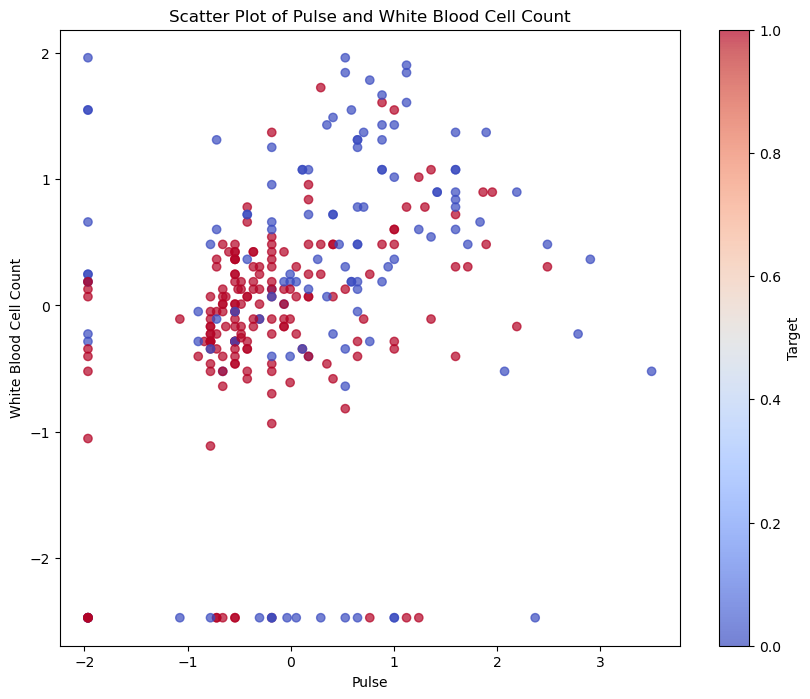

In [39]:
# 选择特定的特征进行训练
selected_features_indices = [3, 17] # 选择第3和第17个特征:脉搏 和 白细胞计数
X_train_selected = X_train[:, selected_features_indices]
X_test_selected = X_test[:, selected_features_indices]

# 使用 'coolwarm' 颜色映射来可视化两个特征的散点图
plt.figure(figsize=(10, 8))
plt.scatter(X_train_selected[:, 0],  # 脉搏
            X_train_selected[:, 1],  # 白细胞计数
            c=y_train,                         # 使用目标值作为颜色映射
            cmap='coolwarm',                   # 颜色映射
            alpha=0.7)                         # 点的透明度

# 添加标题和轴标签
plt.title('Scatter Plot of Pulse and White Blood Cell Count')
plt.xlabel('Pulse')
plt.ylabel('White Blood Cell Count')
plt.colorbar(label='Target')  # 显示颜色条，表示目标值

# 显示图形
plt.show()

In [40]:
def analyze_algorithm(X_train, y_train, X_test, y_test, algorithm, iterations):
    train_accuracies = []
    test_accuracies = []

    for num_iter in iterations:
        weights = algorithm(X_train, y_train, num_iter)
        y_train_pred = [1 if sigmoid(np.dot(X_train[i], weights)) > 0.5 else 0 for i in range(len(y_train))]
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_accuracies.append(train_accuracy)

        y_test_pred = [1 if sigmoid(np.dot(X_test[i], weights)) > 0.5 else 0 for i in range(len(y_test))]
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_accuracies.append(test_accuracy)

    # 绘制迭代次数与准确率的关系图
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, train_accuracies, marker='o', label='Training Accuracy')
    plt.plot(iterations, test_accuracies, marker='s', label='Test Accuracy')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Accuracy')
    plt.title(f'Effect of Iteration Numbers on Accuracy using {algorithm.__name__}')
    plt.legend()
    plt.grid(True)
    plt.show()

    return train_accuracies, test_accuracies

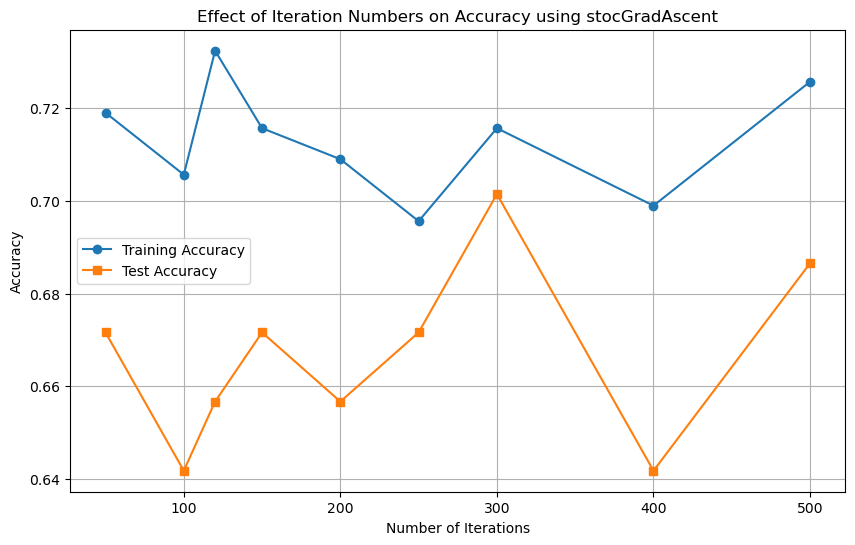

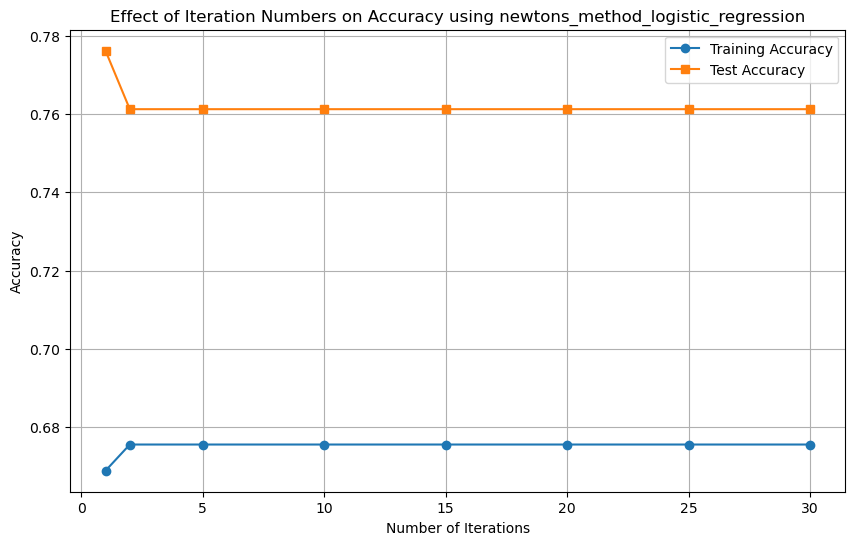

([0.6688963210702341,
  0.6755852842809364,
  0.6755852842809364,
  0.6755852842809364,
  0.6755852842809364,
  0.6755852842809364,
  0.6755852842809364,
  0.6755852842809364],
 [0.7761194029850746,
  0.7611940298507462,
  0.7611940298507462,
  0.7611940298507462,
  0.7611940298507462,
  0.7611940298507462,
  0.7611940298507462,
  0.7611940298507462])

In [41]:
# 为牛顿法添加截距项
X_train_newton = np.hstack((np.ones((X_train_selected.shape[0], 1)), X_train_selected))
X_test_newton = np.hstack((np.ones((X_test_selected.shape[0], 1)), X_test_selected))

# 使用牛顿法训练模型
weights_newton = newtons_method_logistic_regression(X_train_newton, y_train)


# 对梯度下降法进行分析
analyze_algorithm(X_train, y_train, X_test, y_test, stocGradAscent, [50, 100, 120, 150, 200, 250, 300, 400, 500])

# 对牛顿法进行分析
analyze_algorithm(X_train_newton, y_train, X_test_newton, y_test, newtons_method_logistic_regression, [1, 2, 5, 10, 15, 20, 25, 30])